<a href="https://colab.research.google.com/github/Rana12222/Data-Analyst-Project-Series2/blob/main/Weather_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
import sklearn

In [3]:
weather=pd.read_csv('/weatherdata.csv',index_col='Date')
weather

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Column1,Column2
Date,,,,,,,,,,,,,
2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.,NaN,NaN
2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.,NaN,NaN
2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.,NaN,NaN
2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.,NaN,NaN
2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,0,1014.36,Partly cloudy starting in the morning.,NaN,NaN
2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,0,1015.16,Partly cloudy starting in the morning.,NaN,NaN
2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,0,1015.66,Partly cloudy starting in the morning.,NaN,NaN


In [4]:
null_pct=weather.apply(pd.isnull).sum()/weather.shape[0]

In [5]:
null_pct

Summary                     0.00000
Precip Type                 0.00536
Temperature (C)             0.00000
Apparent Temperature (C)    0.00000
Humidity                    0.00000
Wind Speed (km/h)           0.00000
Wind Bearing (degrees)      0.00000
Visibility (km)             0.00000
Loud Cover                  0.00000
Pressure (millibars)        0.00000
Daily Summary               0.00000
Column1                     1.00000
Column2                     1.00000
dtype: float64

In [6]:
val_columns=weather.columns[null_pct<0.5] #calculate null percentage

In [7]:
val_columns

Index(['Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Loud Cover', 'Pressure (millibars)',
       'Daily Summary'],
      dtype='object')

In [8]:
weather=weather[val_columns].copy() #get removed columns those have missing values

In [9]:
weather

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Date,,,,,,,,,,,
2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...
2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,0,1014.36,Partly cloudy starting in the morning.
2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,0,1015.16,Partly cloudy starting in the morning.
2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,0,1015.66,Partly cloudy starting in the morning.


In [10]:
weather = weather.ffill()

In [11]:
weather.apply(pd.isnull).sum()

Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [12]:
weather.dtypes

Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)        int64
Visibility (km)             float64
Loud Cover                    int64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [13]:
weather.index

Index(['2006-04-01 00:00:00.000 +0200', '2006-04-01 01:00:00.000 +0200',
       '2006-04-01 02:00:00.000 +0200', '2006-04-01 03:00:00.000 +0200',
       '2006-04-01 04:00:00.000 +0200', '2006-04-01 05:00:00.000 +0200',
       '2006-04-01 06:00:00.000 +0200', '2006-04-01 07:00:00.000 +0200',
       '2006-04-01 08:00:00.000 +0200', '2006-04-01 09:00:00.000 +0200',
       ...
       '2016-09-09 14:00:00.000 +0200', '2016-09-09 15:00:00.000 +0200',
       '2016-09-09 16:00:00.000 +0200', '2016-09-09 17:00:00.000 +0200',
       '2016-09-09 18:00:00.000 +0200', '2016-09-09 19:00:00.000 +0200',
       '2016-09-09 20:00:00.000 +0200', '2016-09-09 21:00:00.000 +0200',
       '2016-09-09 22:00:00.000 +0200', '2016-09-09 23:00:00.000 +0200'],
      dtype='object', name='Date', length=96453)

In [14]:
weather.index = pd.to_datetime(weather.index)

<Axes: xlabel='Date'>

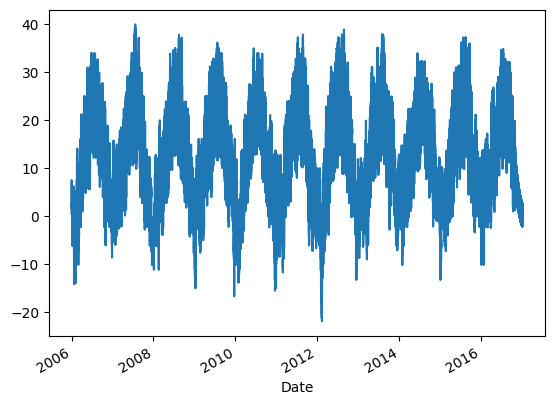

In [17]:
weather['Temperature (C)'].plot()

In [18]:
weather['target']=weather.shift(-1)['Temperature (C)'] # to predict tommorow temperature

In [19]:
weather

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,target
Date,,,,,,,,,,,,
2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.,9.355556
2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.,9.377778
2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.,8.288889
2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.,8.755556
2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.,9.222222
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-09-09 19:00:00+02:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,0,1014.36,Partly cloudy starting in the morning.,24.583333
2016-09-09 20:00:00+02:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,0,1015.16,Partly cloudy starting in the morning.,22.038889
2016-09-09 21:00:00+02:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,0,1015.66,Partly cloudy starting in the morning.,21.522222


In [20]:
weather.ffill()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,target
Date,,,,,,,,,,,,
2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.,9.355556
2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.,9.377778
2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.,8.288889
2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.,8.755556
2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.,9.222222
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-09-09 19:00:00+02:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,0,1014.36,Partly cloudy starting in the morning.,24.583333
2016-09-09 20:00:00+02:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,0,1015.16,Partly cloudy starting in the morning.,22.038889
2016-09-09 21:00:00+02:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,0,1015.66,Partly cloudy starting in the morning.,21.522222


In [23]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=.1)


In [24]:
predictors = weather.columns[~weather.columns.isin(["Summary","Precip Type","Daily Summary","target"])]

In [25]:
predictors

Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Loud Cover', 'Pressure (millibars)'],
      dtype='object')

In [26]:
def backtest(weather, model, predictors, start=3650, step=90):
    all_predictions = []

    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]

        model.fit(train[predictors], train["target"])

        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()

        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [28]:
predictions = backtest(weather, rr, predictors)

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error



In [33]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
Date,,,
2009-01-09 23:00:00+01:00,18.888889,-10.705524,2.959441e+01
2013-08-09 23:00:00+02:00,-2.177778,23.401512,2.557929e+01
2007-08-09 23:00:00+02:00,-1.616667,22.798164,2.441483e+01
2012-06-09 23:00:00+02:00,0.000000,23.466108,2.346611e+01
2012-01-09 23:00:00+01:00,24.955556,2.520317,2.243524e+01
...,...,...,...
2014-07-11 01:00:00+02:00,15.588889,15.588876,1.327391e-05
2010-11-23 15:00:00+01:00,7.722222,7.722232,9.948760e-06
2008-01-05 15:00:00+01:00,-3.061111,-3.061103,8.590070e-06


In [34]:
pd.Series(rr.coef_, index=predictors)

Temperature (C)             0.978302
Apparent Temperature (C)    0.022104
Humidity                    0.829568
Wind Speed (km/h)           0.005957
Wind Bearing (degrees)     -0.000346
Visibility (km)            -0.030946
Loud Cover                  0.000000
Pressure (millibars)        0.000060
dtype: float64

In [35]:
pd.Series(rr.coef_, index=predictors)

Temperature (C)             0.978302
Apparent Temperature (C)    0.022104
Humidity                    0.829568
Wind Speed (km/h)           0.005957
Wind Bearing (degrees)     -0.000346
Visibility (km)            -0.030946
Loud Cover                  0.000000
Pressure (millibars)        0.000060
dtype: float64

In [37]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
Date,,,
2009-01-09 23:00:00+01:00,18.888889,-10.705524,2.959441e+01
2013-08-09 23:00:00+02:00,-2.177778,23.401512,2.557929e+01
2007-08-09 23:00:00+02:00,-1.616667,22.798164,2.441483e+01
2012-06-09 23:00:00+02:00,0.000000,23.466108,2.346611e+01
2012-01-09 23:00:00+01:00,24.955556,2.520317,2.243524e+01
...,...,...,...
2014-07-11 01:00:00+02:00,15.588889,15.588876,1.327391e-05
2010-11-23 15:00:00+01:00,7.722222,7.722232,9.948760e-06
2008-01-05 15:00:00+01:00,-3.061111,-3.061103,8.590070e-06


<Axes: >

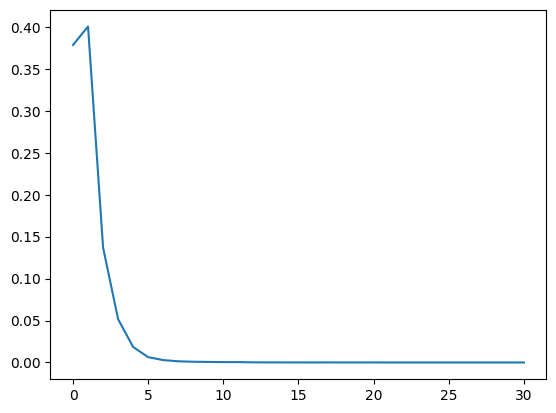

In [38]:
(predictions["diff"].round().value_counts().sort_index() / predictions.shape[0]).plot()

In [39]:
predictions

,actual,prediction,diff
Date,,,
2006-07-10 02:00:00+02:00,15.094444,17.551992,2.457548
2006-07-10 03:00:00+02:00,14.005556,14.946819,0.941263
2006-07-10 04:00:00+02:00,14.200000,13.976423,0.223577
2006-07-10 05:00:00+02:00,16.094444,14.303356,1.791088
2006-07-10 06:00:00+02:00,21.905556,16.128264,5.777291
...,...,...,...
2016-09-09 19:00:00+02:00,24.583333,25.671285,1.087952
2016-09-09 20:00:00+02:00,22.038889,24.294270,2.255381
2016-09-09 21:00:00+02:00,21.522222,21.788172,0.265950
